## By Adrian Abeyta and Noemi Turner

In [266]:
import importlib
import numpy as np

import utils
importlib.reload(utils)
import plot_utils as pu
importlib.reload(pu)
from mysklearn import myutils
importlib.reload(myutils)
from mypytable import MyPyTable
import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyKNeighborsClassifier, MyDummyClassifier, MyNaiveBayesClassifier

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

In [195]:
data = MyPyTable()
data.load_from_file("input_data/forbes_data.csv")

# Clean Data

In [196]:
num_rows, num_cols = data.get_shape()
data.convert_to_numeric()
y_data = utils.discritize_data_by_million(data)


# KNN Classifier

In [269]:
knn = MyKNeighborsClassifier(n_neighbors=10)
knn_combined_data = []
sport = utils.get_column(data.data, data.column_names, "Sport")
sport_values, sport_counts = utils.get_frequencies(data.data, data.column_names, "Sport")
country = utils.get_column(data.data, data.column_names, "Nationality")
country_values, country_counts = utils.get_frequencies(data.data, data.column_names, "Nationality")
# transform the sports and nationalities to numbers
for index, value in enumerate(sport_values):
    for row in range(len(sport)):
        if sport[row] == value:
            sport[row] = index + 1
for index, single_country in enumerate(country_values):
    for row in range(len(country)):
        if country[row] == single_country:
            country[row] = index + 1
for i in range(len(sport)):
    knn_combined_data.append([country[i], sport[i]])
knn_X_train, knn_X_test, knn_y_train, knn_y_true = myevaluation.train_test_split(knn_combined_data, y_data)
knn.fit(knn_X_train, knn_y_train)
knn_y_pred = knn.predict(knn_X_test)

# Split Data

In [221]:
#col = utils.get_column(data.data, data.column_names, "earnings_($ million)")
combined_data = []
sport = utils.get_column(data.data, data.column_names, "Sport")
country = utils.get_column(data.data, data.column_names, "Nationality")
for i in range(len(sport)):
    country[i] = country[i].lower()
    sport[i] = sport[i].lower()
    combined_data.append([country[i], sport[i]])
X_train, X_test, y_train, y_true = myevaluation.train_test_split(combined_data, y_data)


# Naive Bayes Classifier

In [229]:
new_Xtrain = []
new_Xtest = []
for item in X_train:
    new_Xtrain.append(item)
for item in X_train:
    new_Xtest.append(item)
nbc = MyNaiveBayesClassifier()
nbc.fit(new_Xtrain, y_train)
nbc_y_pred = nbc.predict(new_Xtest)
for y in range(len(y_pred)):
    if nbc_y_pred[y] == 0:
        nbc_y_pred[y] = "low"
    if nbc_y_pred[y] == 1:
        nbc_y_pred[y] = "medium"
    if nbc_y_pred[y] == 2:
        nbc_y_pred[y] = "high"

# Dummy Classifier

In [234]:
dc = MyDummyClassifier()
dc.fit(X_train, y_train)
dc_y_pred = dc.predict(X_test)

# Map Data

## Sport

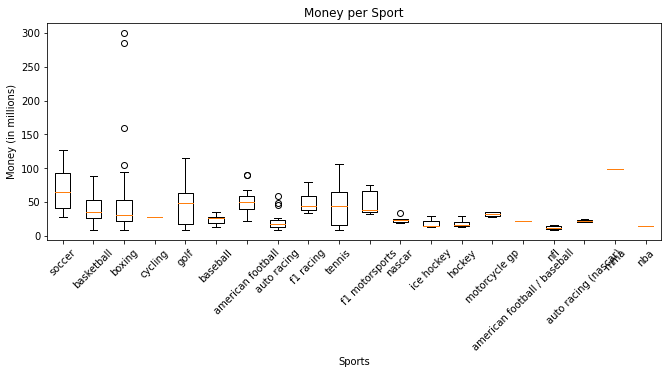

In [ ]:
data.remove_rows_with_missing_values()
#print(table.data)
sports = data.get_column("Sport")
money = data.get_column("earnings_($ million)")
for i in range(len(sports)):
    sports[i] = sports[i].lower()
sports_split = utils.split_string_count(sports)
unique_sports = utils.get_genres(sports_split)
total_scores = utils.divide_ratings(unique_sports, sports, money)
for row in total_scores:
    while('' in row):
        row.remove('')
pu.generate_box_plot(total_scores, unique_sports, "Sports", "Money (in millions)", "Money per Sport")

## Nationality

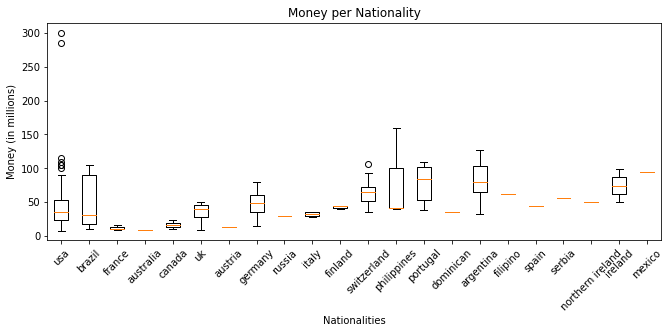

In [274]:
data.remove_rows_with_missing_values()
nationality = data.get_column("Nationality")
money = data.get_column("earnings_($ million)")
for i in range(len(nationality)):
    nationality[i] = nationality[i].lower()
nationality_split = utils.split_string_count(nationality)
unique_nationalities = utils.get_genres(nationality_split)
total_scores = utils.divide_ratings(unique_nationalities, nationality, money)
for row in total_scores:
    while('' in row):
        row.remove('')
pu.generate_box_plot(total_scores, unique_nationalities, "Nationalities", "Money (in millions)", "Money per Nationality")

## Dummy Statistics

In [272]:
accuracy = myevaluation.accuracy_score(y_true, dc_y_pred)
bps = myevaluation.binary_precision_score(y_true, dc_y_pred)
brs = myevaluation.binary_recall_score(y_true, dc_y_pred)
print("Accuracy:", accuracy)
print("Error Rate", 1 - accuracy)
print("Binary Precision Score:", bps)
print("Binary Recall Score:", brs)

Accuracy: 0.32
Error Rate 0.6799999999999999
Binary Precision Score: 0.32
Binary Recall Score: 1.0


## KNN Statistics

In [270]:
accuracy = myevaluation.accuracy_score(y_true, knn_y_pred)
bps = myevaluation.binary_precision_score(y_true, knn_y_pred)
brs = myevaluation.binary_recall_score(y_true, knn_y_pred)
print("Accuracy:", accuracy)
print("Error Rate", 1 - accuracy)
print("Binary Precision Score:", bps)
print("Binary Recall Score:", brs)

Accuracy: 0.34
Error Rate 0.6599999999999999
Binary Precision Score: 0.325
Binary Recall Score: 0.25


## Naive Bayes Statistics

In [271]:
accuracy = myevaluation.accuracy_score(y_true, nbc_y_pred)
bps = myevaluation.binary_precision_score(y_true, nbc_y_pred)
brs = myevaluation.binary_recall_score(y_true, nbc_y_pred)
print("Accuracy:", accuracy)
print("Error Rate", 1 - accuracy)
print("Binary Precision Score:", bps)
print("Binary Recall Score:", brs)

Accuracy: 0.3
Error Rate 0.7
Binary Precision Score: 0.21875
Binary Recall Score: 0.1346153846153846
